<a href="https://colab.research.google.com/github/YuriEvyp/Ztransform_exercise/blob/main/transformadaZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align= "center">Exercicio de Transformada Z<h1>

> Usando a Transformada z, projete uma função complexa, cuja amplitude seja oscilatória. Para essa função desenhe o diagrama de pólos e zeros, a posição do pólo e a transformada de Fourier.
<br>




Autor:Yuri Siqueira Dantas
<br>Matrícula:119110765

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scp
import warnings

warnings.filterwarnings('ignore')

Usando a função $x(n)=\alpha^nu(n)$, se fizermos $\alpha = Ae^{j\omega}$, x(n) torna-se uma função complexa <br>
 a transformada Z será $\frac{1}{1 - p_1z^{-1}} + \frac{1}{1 - p_2z^{-1}}$, com $p_1 = Ae^{j\Omega}$ e $p_2 = p_1^*$.
 <br>Para torná-la oscilante, devemos ter $A = -1$.
 <br>Para calcular a transformada de fourier basta fazer: $z = e^{j\Omega}$
<br> Como $\Omega$ é um ponto arbitrário , foi escolhido $\Omega = \frac{π}{2}$
<br><br>Logo teremos $X(\Omega) = \frac{1}{1 +e^{-j\frac{π}{2}}e^{-j\Omega}} + \frac{1}{1 +e^{j\frac{π}{2}}e^{-j\Omega}}$
 

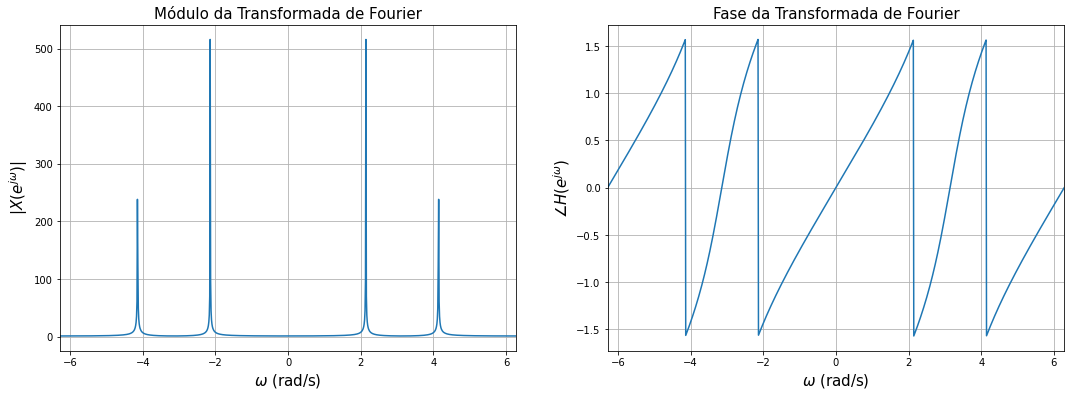

In [ ]:
w = np.linspace(-2*np.pi,2*np.pi, 1024)
X = 1/(1+np.exp(-1j*np.pi/2)*np.exp(-1j*w)) + 1/(1 + np.exp(1j*np.pi/2)*np.exp(-1j*w)) #Transformada de Fourier

figure, ax = plt.subplots(1, 2, figsize = (18,6))

ax[0].plot(w,abs(X))
ax[0].set_xlim(-2*np.pi, 2*np.pi)
ax[0].set_xlabel(r'$\omega$ (rad/s)', fontsize = 15)
ax[0].set_ylabel(r'$|X(e^{j\omega})|$', fontsize = 15)
ax[0].set_title('Módulo da Transformada de Fourier', fontsize = 15)
ax[0].grid(True)

ax[1].plot(w, np.unwrap(np.angle(X)))
ax[1].set_xlim(-2*np.pi, 2*np.pi)
ax[1].set_xlabel(r'$\omega$ (rad/s)', fontsize = 15)
ax[1].set_ylabel(r'$\angle H(e^{j\omega})$', fontsize = 15)
ax[1].set_title('Fase da Transformada de Fourier', fontsize = 15)
ax[1].grid(True)

$X(z) = \frac {1}{1 +e^{-j\Omega}z^{-1}} + \frac {1}{1 +e^{j\Omega}z^{-1}}$ <br>
<br>$X(z) = \frac {1+e^{j\Omega}z^{-1}+1+e^{-j\Omega}z^{-1}}{(1 +e^{-j\Omega}z^{-1})(1 +e^{j\Omega}z^{-1})}$<br><br>
$X(z) = \frac {2+2cos(\Omega)z^{-1}}{(1 +e^{-j\Omega}z^{-1})(1 +e^{j\Omega}z^{-1})} * \frac{z^{2}}{z^{2}}$<br><br>
$X(z) =  \frac {2z^{2}+2cos(\Omega)z}{(z +e^{-j\Omega})(z +e^{j\Omega})}$<br><br>
Logo, tem um zero em $z = 0$ e polos em $z = -e^{-j\Omega}$ e $z = -e^{j\Omega}$
<br> Lembrando que $\Omega = \frac{π}{2}$


Roc: como nossa função é dada por $a^n u(n)$, sabemos que ela é lateral direita, portanto sua ROC será desde a circunferência de
 raio igual ao módulo do polo mais afastado da origem até ∞.

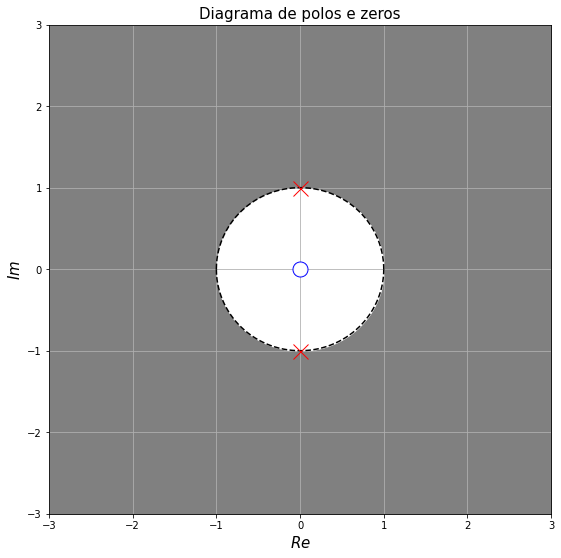

In [ ]:
zeros = np.array([0])
polos = np.array([-np.exp(-1j*np.pi/2), -np.exp(1j*np.pi/2)])

x = np.linspace(-3, 3, 10000)
circulo = np.sqrt(1**2 - x**2)
hachura1 = 3 + 0*x
hachura2 = -3 + 0*x

plt.figure(figsize = (9,9))

plt.plot(x, circulo, color = 'black', ls = '--')
plt.plot(x, -1*circulo, color = 'black', ls = '--')
plt.fill_between(x, hachura1, alpha = 1, color = 'gray')
plt.fill_between(x, hachura2, alpha = 1, color = 'gray')
plt.fill_between(x, circulo, color = 'white')
plt.fill_between(x, -1*circulo, color = 'white')
plt.plot(np.real(polos[0]), np.imag(polos[0]), marker = 'x', color = 'red', markersize = 15)
plt.plot(np.real(polos[1]), np.imag(polos[1]), marker = 'x', color = 'red', markersize = 15)
plt.plot(zeros, 0, marker = 'o', color = 'blue', markersize = 15)
plt.plot(zeros, 0, marker = 'o', color = 'white', markersize = 13)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('$Re$', fontsize = 15)
plt.ylabel('$Im$', fontsize = 15)
plt.title('Diagrama de polos e zeros', fontsize = 15)
plt.grid(True)